Using Riot API to get necessary parameters 

In [1]:
#Adding dependency to make a request to the API 
import requests

#Prompting user for API Key and storing in variable 
api_key = input('What is your API key? ')

url = 'https://americas.api.riotgames.com/riot/account/v1/accounts/by-riot-id/Phant%C3%B3m/NA1'

# Set up headers with the API key
headers = {
    'X-Riot-Token': api_key
}
    
# Send the GET request to the API
response = requests.get(url, headers=headers)

# Check if the response status is 200 (success)
if response.status_code == 200:
    # Parse the JSON response into a Python dictionary
    data = response.json()
    print(data)  # Return or print the JSON object
else:
    # If there's an error, print the status code and error message
    print(f"Error: {response.status_code} - {response.text}")

data

{'puuid': 'jq_A-Q1qsDMSLr7KbONxw_JBVPdGJq6hxcIgZq2GHynjwJyuKF45IGTAoFJmpPPo-36Fpm4qtl4BNQ', 'gameName': 'Phantóm', 'tagLine': 'NA1'}


{'puuid': 'jq_A-Q1qsDMSLr7KbONxw_JBVPdGJq6hxcIgZq2GHynjwJyuKF45IGTAoFJmpPPo-36Fpm4qtl4BNQ',
 'gameName': 'Phantóm',
 'tagLine': 'NA1'}

In [2]:
#Accessing request URL with puuid to get 20 most recent match IDs 
url = 'https://americas.api.riotgames.com/lol/match/v5/matches/by-puuid/jq_A-Q1qsDMSLr7KbONxw_JBVPdGJq6hxcIgZq2GHynjwJyuKF45IGTAoFJmpPPo-36Fpm4qtl4BNQ/ids?start=0&count=20'

response = requests.get(url)

##Storing IDs in variable
match_id = response.json()

In [ ]:
#Accessing request URL with match ID to get match data 
url = 'https://americas.api.riotgames.com/lol/match/v5/matches/NA1_5212771073'

##Adding API Key as custom argument so URL can be accessed without security issue
api_url = url + '?api_key=' + api_key

response = requests.get(api_url)

match_data = response.json()

##Storing specified match data in variable
match_data

In [4]:
#Slicing data for specific players in match data object and storing in variable 
player_data = match_data['info']['participants'][0]

##Storing kills, assists, and deaths in variables
kills = player_data['kills']
assists = player_data['assists']
deaths = player_data['deaths']

##Outputting stats 
print(f'Kill total in the match: {kills}')
print(f'Death total in the match: {deaths}')
print(f'Assist total in the match: {assists}')
print(f'KDA total in the match: {(kills + assists)/deaths}')

Kill total in the match: 27
Death total in the match: 6
Assist total in the match: 26
KDA total in the match: 8.833333333333334


In [5]:
##Outputting all puuids(Player IDs) of individualds in specified match
participants = match_data['metadata']['participants']

participants

['jq_A-Q1qsDMSLr7KbONxw_JBVPdGJq6hxcIgZq2GHynjwJyuKF45IGTAoFJmpPPo-36Fpm4qtl4BNQ',
 'K-ozVgfoJw4PPUvmFEzbxVAE_n2eRnBay9yWZNF6qZbXWLf8aCP5hzc2L2QeCUJ9lGWi_C6LBd-h5w',
 'nTdwJaPqIjDsU9vIxPy-gF59GFthARx1KpbMCCxamm_iinCfo9NTp9kP-RLAEo-4950B_lrlOsmDeg',
 'klt44NhiH2ZmdwwCVorBtdSHjlhT5xqL9jYraH3CkwH-aXp9_iS039YAaPmuIhOJWPXNQyQqNg7clA',
 '9F61nwQtTnNpgtkbm9KTPozLLjqiMHyVX_L7q_LoukyfENGJlwJxFWkW-g8aVjfL2kEyZ_6dzS5Y4g',
 'HjcBgoD-VUnbV7N5AjMtiPcWc3tPgK0UB28r3d9BhJUPZqDZZIi7hVyvb7WuRorkoeB2EMOCZtbs0w',
 'wkdhQRwhbHbh4gt5SRjm0aTZep3ebUcctebISO-n8wBO8dLnx5xfiTQ6ad6LIFU_bQINX6b74p-qmA',
 'lA1CiRasomqXjE9Pjry7TckOuiOec4serqZiHReGU7SaJ2PWb33-s-JdZXTg4WD7CSwF6ohgI4Rgkw',
 'hOwkIOp5dLXGd_GxM69aEOevw-qnIehGb67tW16nkvogT2q36O3bM00EbIaPyTkjHLEgeZG6eyRxyA',
 'XL7VHxXDvSaikIvHYun8rm70IhH3dNgqI8D592z49qMmbZTgu_5D4TS1RrHH3czkv248wk2fTvq2Sw']

In [6]:
#Storing puuids into Player variables
Player1 = 'jq_A-Q1qsDMSLr7KbONxw_JBVPdGJq6hxcIgZq2GHynjwJyuKF45IGTAoFJmpPPo-36Fpm4qtl4BNQ'
Player2 = 'K-ozVgfoJw4PPUvmFEzbxVAE_n2eRnBay9yWZNF6qZbXWLf8aCP5hzc2L2QeCUJ9lGWi_C6LBd-h5w'
Player3 = 'nTdwJaPqIjDsU9vIxPy-gF59GFthARx1KpbMCCxamm_iinCfo9NTp9kP-RLAEo-4950B_lrlOsmDeg'
Player4 = 'klt44NhiH2ZmdwwCVorBtdSHjlhT5xqL9jYraH3CkwH-aXp9_iS039YAaPmuIhOJWPXNQyQqNg7clA'
Player5 = '9F61nwQtTnNpgtkbm9KTPozLLjqiMHyVX_L7q_LoukyfENGJlwJxFWkW-g8aVjfL2kEyZ_6dzS5Y4g'

In [7]:
#Indexxing for my player and storing in Player Index variable
player_index = participants.index(Player1)

match_data['info']['participants'][player_index]['summonerName']

##Slicing for my player data 
player_data = match_data['info']['participants'][player_index]

##Storing specific metrics about match for my player in variables 
minions__killed = player_data['totalMinionsKilled']
champ = player_data['championName']
physical_damage = player_data['physicalDamageDealt']
magic_damage = player_data['magicDamageDealt']
total_damage = player_data['totalDamageDealt']
gold_earned = match_data['info']['participants'][player_index]['goldEarned']

##Outputting stats
print(f'Total minions kills: {minions__killed}')
print(f'While playing {champ} I dealt {(physical_damage/total_damage * 100)}% physical damage and {(magic_damage/total_damage * 100)}% magic damage!')
print(f'The amount of gold that I earned in this match was: {gold_earned}')

Total minions kills: 125
While playing Lucian I dealt 89.52407827901666% physical damage and 9.941723870899999% magic damage!
The amount of gold that I earned in this match was: 18118


Creating functions to help with readability and reusability

In [8]:
#This function returns puuid by using summoner name, player tagline, and region as parameters
def get_puuid(summoner_name, tagline, region, api_key):
    api_url = (
        f'https://'+ region + '.api.riotgames.com/riot/account/v1/accounts/by-riot-id/' 
        + summoner_name +'/' + tagline + '?api_key=' + api_key)
    print(f'Requesting API URL: {api_url}')
    ##API Request
    resp = requests.get(api_url)
    
    ##If statement for successful request otherwise prints status message
    if resp.status_code == 200:
        player_info = resp.json()
        puuid = player_info['puuid']
        return puuid
    else:
        print(f'Error:{resp.status_code}, {resp.text}')
        return None

#Calling function to get desired puuid
get_puuid('Phantóm', 'NA1', 'americas', api_key)

Requesting API URL: https://americas.api.riotgames.com/riot/account/v1/accounts/by-riot-id/Phantóm/NA1?api_key=RGAPI-2c25615f-5f39-4537-b1da-44e64f377eb0


'jq_A-Q1qsDMSLr7KbONxw_JBVPdGJq6hxcIgZq2GHynjwJyuKF45IGTAoFJmpPPo-36Fpm4qtl4BNQ'

In [9]:
#This function returns 20 most recent matches by using the respective puuid and region
def get_matches(puuid, region, api_key):
    api_url = (f'https://' + region + '.api.riotgames.com/lol/match/v5/matches/by-puuid/' 
               + puuid + '/ids?start=0&count=20' + '&api_key=' + api_key)
    print(f'Requesting API URL: {api_url}')
    
    ##API Request
    resp = requests.get(api_url)

    ##If statement for successful request otherwise prints status message
    if resp.status_code == 200:
        match_ids = resp.json()
        return match_ids
    else:
        print(f'Error Received: {resp.status_code}', {resp.text})
        return None

#Calling function to get 20 most recent match IDS for specified user
get_matches('jq_A-Q1qsDMSLr7KbONxw_JBVPdGJq6hxcIgZq2GHynjwJyuKF45IGTAoFJmpPPo-36Fpm4qtl4BNQ', 'americas', api_key)

Requesting API URL: https://americas.api.riotgames.com/lol/match/v5/matches/by-puuid/jq_A-Q1qsDMSLr7KbONxw_JBVPdGJq6hxcIgZq2GHynjwJyuKF45IGTAoFJmpPPo-36Fpm4qtl4BNQ/ids?start=0&count=20&api_key=RGAPI-2c25615f-5f39-4537-b1da-44e64f377eb0


['NA1_5216283044',
 'NA1_5216264657',
 'NA1_5216243677',
 'NA1_5213549587',
 'NA1_5213520491',
 'NA1_5212794969',
 'NA1_5212771073',
 'NA1_5210032454',
 'NA1_5210025036',
 'NA1_5210011121',
 'NA1_5209989228',
 'NA1_5207701701',
 'NA1_5207685142',
 'NA1_5205761116',
 'NA1_5205737558',
 'NA1_5194644149',
 'NA1_5194626272',
 'NA1_5194605614',
 'NA1_5187419555',
 'NA1_5187394878']

In [ ]:
#Function to get all match data by using match id and region parameters
def get_match_data(match_id, region, api_key):
    api_url = (f'https://{region}.api.riotgames.com/lol/match/v5/matches/{match_id}?api_key={api_key}')
    
    ##API Request
    resp = requests.get(api_url)

    ##If statement for successful request otherwise prints status message
    if resp.status_code == 200:
        match_data = resp.json()
        return match_data
    else:
        print(f'Error Received: {resp.status_code}', {resp.text})
        return None
    
#Calling function to get all match data for a specified match id
get_match_data('NA1_5194605614', 'americas', api_key)

In [11]:
#Retrieves the player data in JSON format by using match data and puuid.
#Intended to be used specifically for next function and not be called individually
def find_player_data(match_data, puuid):

    # Iterate over the participants in the match data
    for participant in match_data.get("info", {}).get("participants", []):
        if participant.get("puuid") == puuid:
            return participant  # Return the matching participant's data
    return None

In [12]:
#Add dependency to convert data object into dataframe
import pandas as pd

##Cumulative function to get specific python list attributes for specified player data
def retrieve_all_data(puuid, region, api_key):
    
    ##Initializing dictionary called data so values can be appended
    data = {
        'champion': [],
        'kills': [],
        'deaths': [],
        'assists': [],
        'killing_sprees': [],
        'gold': [],
        'damage_dealt': [],
        'win': [],
        'Playtime (s)': []
    }

    ##Giving list of match ids for data to be extracted
    match_ids = ['NA1_5213549587',
'NA1_5213520491',
 'NA1_5212794969',
 'NA1_5212771073',
 'NA1_5210032454',
 'NA1_5210025036',
 'NA1_5210011121',
 'NA1_5209989228',
 'NA1_5207701701',
 'NA1_5207685142',
 'NA1_5205761116',
 'NA1_5205737558',
 'NA1_5194644149',
 'NA1_5194626272',
 'NA1_5194605614',
 'NA1_5187419555',
 'NA1_5187394878',
 'NA1_5187367363',
 'NA1_5187344821',
 'NA1_5186325149']

    ##For loop so below functions can run for each match id 
    for match_id in match_ids: 
        # run the two functions to get the player data from the match ID
        match_data = get_match_data(match_id, region, api_key)
        player_data = find_player_data(match_data, puuid)
        champion = (player_data['championName'])
        k = (player_data['kills'])
        a = (player_data['assists'])
        d = (player_data['deaths'])
        killing_sprees = (player_data['killingSprees'])
        gold = (player_data['goldEarned'])
        damage = (player_data['totalDamageDealt'])
        victory = (player_data['win'])
        playtime = (player_data['timePlayed'])

        ##Appending values to data dictionary object
        data['champion'].append(champion)
        data['kills'].append(k)
        data['deaths'].append(d)
        data['assists'].append(a)
        data['killing_sprees'].append(killing_sprees)
        data['gold'].append(gold)
        data['damage_dealt'].append(damage)
        data['win'].append(victory)
        data['Playtime (s)'].append(playtime)

    ##Converting data dictionary to dataframe object for analysis/manipulation
    df = pd.DataFrame(data)

    df['win'] = df['win'].astype(int) # change this column from boolean (True/False) to be integers (1/0)
    
    return df

Exploratory Data Analysis

In [13]:
#Looking at df to understand table structure and data
df = retrieve_all_data('jq_A-Q1qsDMSLr7KbONxw_JBVPdGJq6hxcIgZq2GHynjwJyuKF45IGTAoFJmpPPo-36Fpm4qtl4BNQ', 'americas', api_key)

df

,champion,kills,deaths,assists,killing_sprees,gold,damage_dealt,win,Playtime (s)
0,Lux,15,10,34,3,16507,135341,0,1482
1,Draven,20,8,23,4,20328,187306,1,1395
2,Twitch,23,11,37,7,19393,130485,1,1622
3,Lucian,27,6,26,6,18118,152378,1,1252
4,Senna,23,7,39,5,16696,142102,1,1288
5,Kalista,12,7,7,4,10747,44745,0,792
6,Twitch,15,7,15,4,13020,61243,0,975
7,Samira,12,7,11,4,13304,63946,0,1124
8,Ezreal,12,9,17,3,15675,122079,1,1278
9,Ezreal,15,7,17,4,13679,117236,0,1095


In [14]:
#Get descriptive statistics to understand data
df.describe()

,kills,deaths,assists,killing_sprees,gold,damage_dealt,win,Playtime (s)
count,20.00000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000
mean,17.55000,7.600000,22.750000,4.650000,15279.300000,117685.700000,0.500000,1169.550000
std,6.15993,1.875044,9.250178,1.348488,3089.035705,51452.945233,0.512989,246.453471
min,10.00000,3.000000,7.000000,3.000000,10191.000000,37973.000000,0.000000,719.000000
25%,12.00000,7.000000,16.500000,4.000000,13233.000000,72792.250000,0.000000,1016.250000
50%,15.00000,7.000000,23.000000,4.000000,15438.000000,122439.500000,0.500000,1180.000000
75%,22.25000,8.250000,29.750000,5.250000,17284.750000,148515.750000,1.000000,1294.250000
max,32.00000,11.000000,39.000000,7.000000,20328.000000,219718.000000,1.000000,1622.000000


In [15]:
#Aggregating damage by champion and ordering by most to least
df_damage = df.groupby('champion', as_index=False)['damage_dealt'].sum()

df_damage = df_damage.sort_values(by='damage_dealt', ascending=False)

##Storing in new dataframe and getting top 10 rows
df_damage.head(10)

,champion,damage_dealt
12,Twitch,453777
3,Ezreal,239315
4,Jinx,219718
1,Corki,190425
2,Draven,187306
7,Lucian,152378
0,Caitlyn,148067
10,Senna,142102
8,Lux,135341
14,Vayne,122800


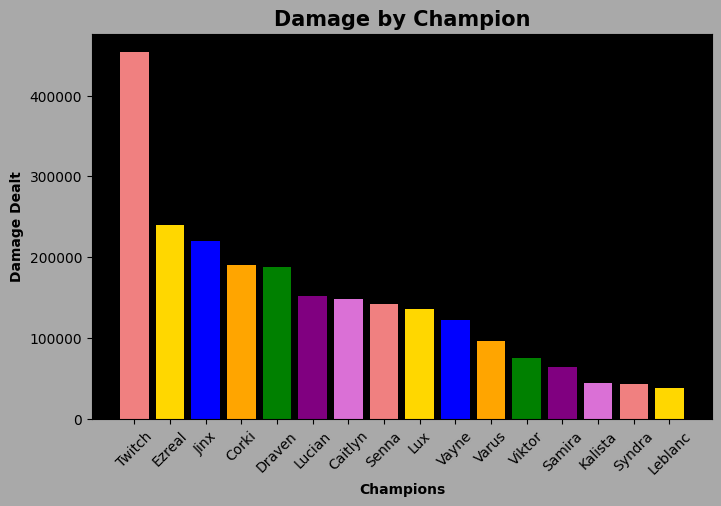

In [16]:
#Adding dependencies for visualiziation creations
import matplotlib.pyplot as plt

##Creating bar chart to show damage by champion in descending order
color = ['lightcoral', 'gold', 'blue', 'orange', 'green', 'purple', 'orchid']

plt.figure(figsize = (8, 5))

plt.gcf().set_facecolor('darkgrey')
plt.gca().set_facecolor('black')

plt.bar(df_damage['champion'], df_damage['damage_dealt'], color=color)
plt.title('Damage by Champion', fontsize = 15, fontweight = 'bold')
plt.xlabel('Champions', fontweight = 'bold')
plt.ylabel('Damage Dealt', fontweight = 'bold')
plt.xticks(rotation=45)

plt.show()


In [17]:
#Aggregating average deaths by champion 
df_deaths = df.groupby('champion', as_index=False)['deaths'].mean()

df_deaths = df_deaths.sort_values(by='deaths', ascending=False)

df_deaths.head()

,champion,deaths
13,Varus,11.0
8,Lux,10.0
6,Leblanc,9.0
3,Ezreal,8.0
4,Jinx,8.0


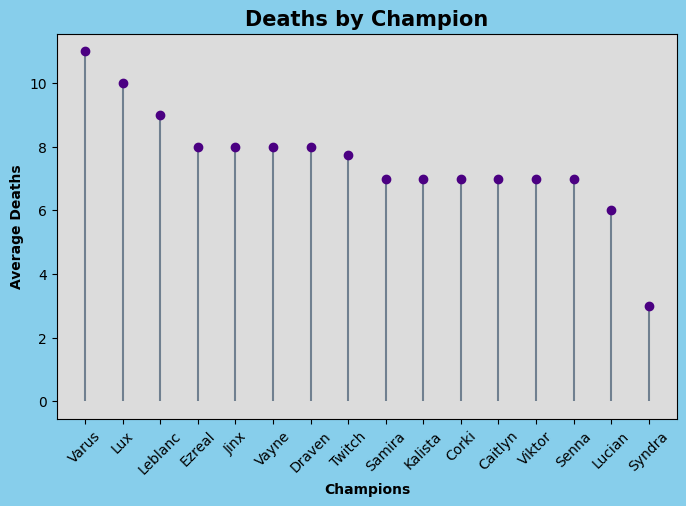

In [18]:
#Creating lollipop chart to visualize death average by champion played
plt.figure(figsize = (8, 5))

plt.gcf().set_facecolor('skyblue')

plt.stem(df_deaths['champion'], df_deaths['deaths'], linefmt='slategrey', markerfmt='indigo', basefmt=' ')
ax = plt.gca()
ax.set_facecolor('gainsboro')

plt.title('Deaths by Champion', fontsize=15, fontweight='bold')
plt.xlabel('Champions', fontweight='bold')
plt.ylabel('Average Deaths', fontweight='bold')
plt.xticks(rotation=45)

plt.show()

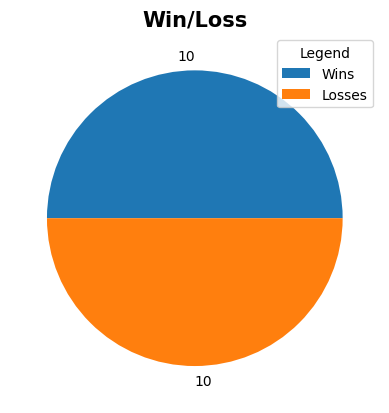

In [19]:
#Creating pie chart to visualize win/loss split
win_loss = df.win.value_counts()

label = ['Wins', 'Losses']

plt.pie(win_loss, labels=win_loss)
plt.legend(label, title='Legend')
plt.title('Win/Loss', fontsize=15, fontweight='bold')

plt.show()

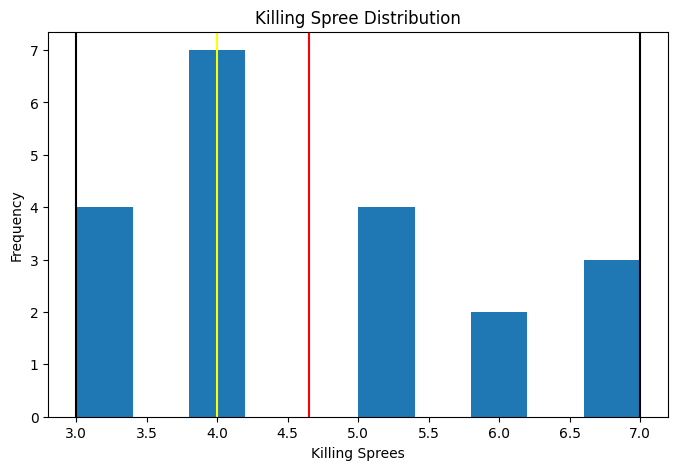

In [20]:
#Creating histogram to visualize killing spree count distribution with measures of central tendency
killing_sprees = df.killing_sprees

mean_value = killing_sprees.mean()
median_value = killing_sprees.median()
min_value = killing_sprees.min()
max_value = killing_sprees.max()

plt.figure(figsize = (8, 5))

plt.hist(killing_sprees)

plt.axvline(x=mean_value, color='red')
plt.axvline(x=median_value, color='yellow')
plt.axvline(x=min_value, color='black')
plt.axvline(x=max_value, color='black')

plt.title('Killing Spree Distribution')
plt.xlabel('Killing Sprees')
plt.ylabel('Frequency')

plt.show()

Feature Engineering and Machine learning to predict future wins and losses

In [21]:
#Creating new features to test stronger correlations
df['gold per Minute'] = round(df['gold'] / df['Playtime (s)'] * 60, 2)

df['damage_dealt per minute'] = round(df['damage_dealt'] / df['Playtime (s)'] * 60, 2)

df.head()

,champion,kills,deaths,assists,killing_sprees,gold,damage_dealt,win,Playtime (s),gold per Minute,damage_dealt per minute
0,Lux,15,10,34,3,16507,135341,0,1482,668.30,5479.39
1,Draven,20,8,23,4,20328,187306,1,1395,874.32,8056.17
2,Twitch,23,11,37,7,19393,130485,1,1622,717.37,4826.82
3,Lucian,27,6,26,6,18118,152378,1,1252,868.27,7302.46
4,Senna,23,7,39,5,16696,142102,1,1288,777.76,6619.66


In [22]:
#Scaling features to standardize data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

df[['gold per Minute', 'damage_dealt per minute']] = scaler.fit_transform(df[['gold per Minute', 'damage_dealt per minute']])

df[['kills', 'assists']] = scaler.fit_transform(df[['kills', 'assists']])

df.head()

,champion,kills,deaths,assists,killing_sprees,gold,damage_dealt,win,Playtime (s),gold per Minute,damage_dealt per minute
0,Lux,-0.424720,10,1.247788,3,16507,135341,0,1482,-1.752484,-0.188788
1,Draven,0.408064,8,0.027729,4,20328,187306,1,1395,1.257945,1.155731
2,Twitch,0.907735,11,1.580531,7,19393,130485,1,1622,-1.035458,-0.529288
3,Lucian,1.573962,6,0.360472,6,18118,152378,1,1252,1.169540,0.762458
4,Senna,0.907735,7,1.802360,5,16696,142102,1,1288,-0.153020,0.406185


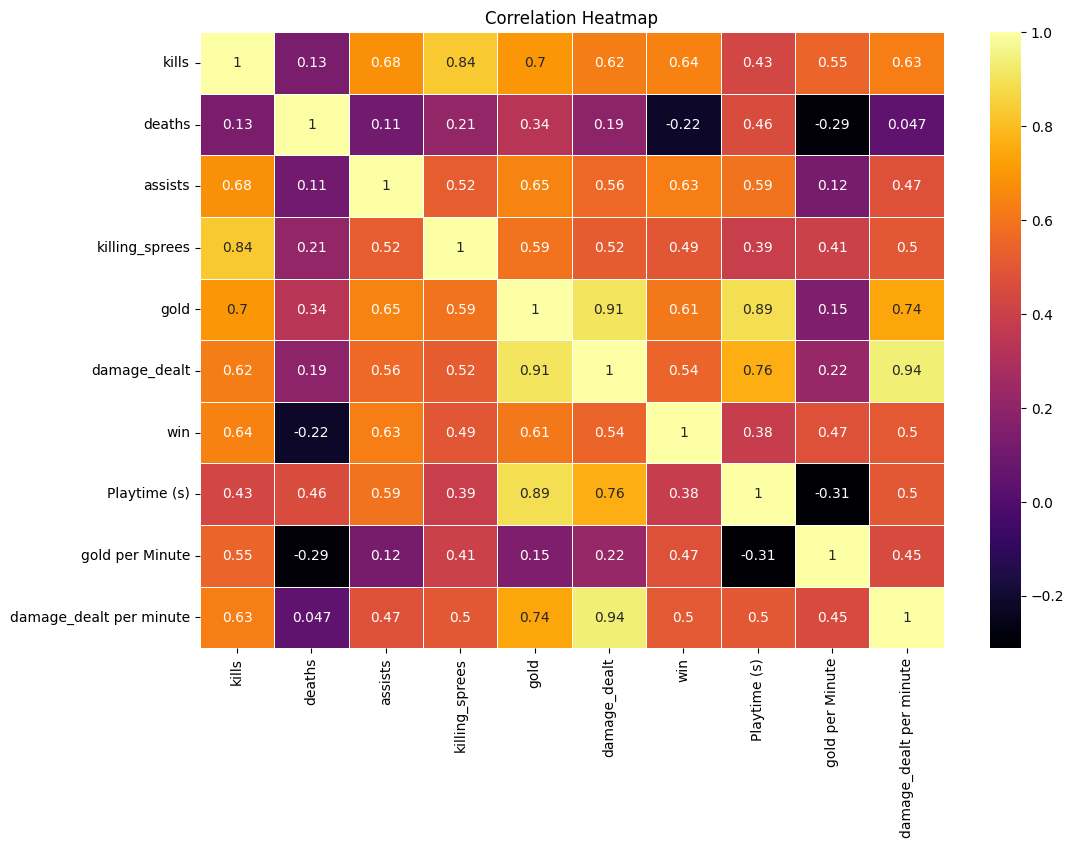

In [23]:
import seaborn as sns

#Calculate the correlation matrix
df_corr = df.drop(columns=['champion'])
correlation_matrix = df_corr.corr()

##Step 2: Use seaborn to create the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='inferno', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [24]:
#Adding dependencies for train/test, model building, and evluation metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

##Creating x variable for features and y variable for target
x = df.drop(columns = ['win', 'gold', 'killing_sprees', 'damage_dealt', 'champion', 'deaths', 'Playtime (s)', 'damage_dealt per minute', 'gold per Minute'])
y = df['win']

##Splitting data into train/test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.20, random_state=42)

In [25]:
#Creating Logistic Regression Model 
model = LogisticRegression()

#Fitting training features and target into model
model.fit(x_train, y_train)

LogisticRegression()

In [26]:
#Make predictions based off test features
prediction = model.predict(x_test)

In [27]:
#Evaluation methods to compare output accuracy
accuracy = accuracy_score(y_test, prediction)
print('Accuracy Score:')
print(accuracy)

matrix = confusion_matrix(y_test, prediction)
print('Confusion Matrix Score:')
print(matrix)

report = classification_report(y_test, prediction)
print('Classification Report')
print(report)

Accuracy Score:
0.75
Confusion Matrix Score:
[[1 1]
 [0 2]]
Classification Report
              precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       0.67      1.00      0.80         2

    accuracy                           0.75         4
   macro avg       0.83      0.75      0.73         4
weighted avg       0.83      0.75      0.73         4



In [28]:
#Testing model on newly created dataset to get win/losses
new_data = [[27, 20], [10, 30], [4, 20], [18, 9], [20, 10], [25, 18]]

new_data = scaler.transform(new_data)

new_prediction = model.predict(new_data)

print(f'New Predictions: {new_prediction}')

New Predictions: [1 1 0 0 0 1]


C:\Users\nikhi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\nikhi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
